In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print(df.head())
print(df.describe())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Create KMeans model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-1])

df["cluster"] = kmeans.fit_predict(X_scaled)


In [3]:
df["cluster"].value_counts()

cluster
0    52
2    49
1    49
Name: count, dtype: int64

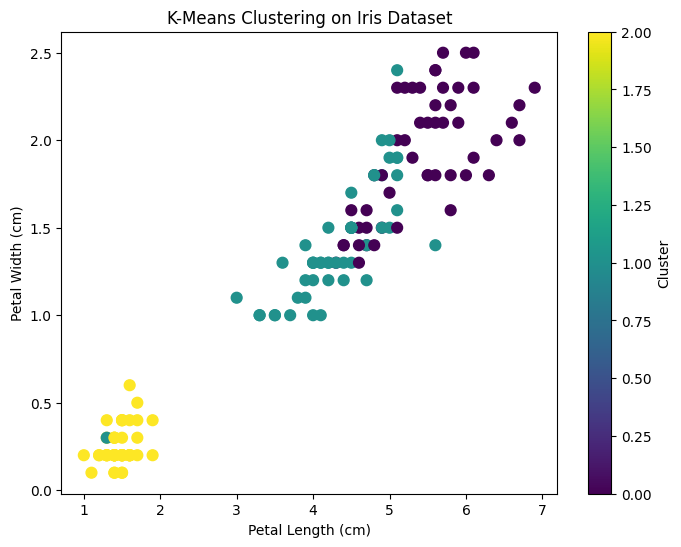

In [4]:
plt.figure(figsize=(8, 6))

plt.scatter(
    df["petal length (cm)"],
    df["petal width (cm)"],
    c=df["cluster"],
    cmap="viridis",
    s=60
)

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("K-Means Clustering on Iris Dataset")
plt.colorbar(label="Cluster")
plt.show()


test Metrics for Clustering

In [5]:
print(pd.crosstab(y, df["cluster"]))

cluster   0   1   2
row_0              
0         0   1  49
1        15  35   0
2        37  13   0


In [6]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

print("Adjusted Rand Index:", adjusted_rand_score(y, df["cluster"]))
print("Silhouette Score:", silhouette_score(df.iloc[:, :-1], df["cluster"]))


Adjusted Rand Index: 0.5717394882425835
Silhouette Score: 0.47976595149902723
